<a href="https://colab.research.google.com/github/Akshaypakhle10/ML/blob/master/Real_Fake_Face_Classification_ipynbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from fastai.vision import *


In [0]:
path = "/content/drive/My Drive/Datasets/real_and_fake_face_detection"

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [16]:
data.classes

['training_fake', 'training_real']

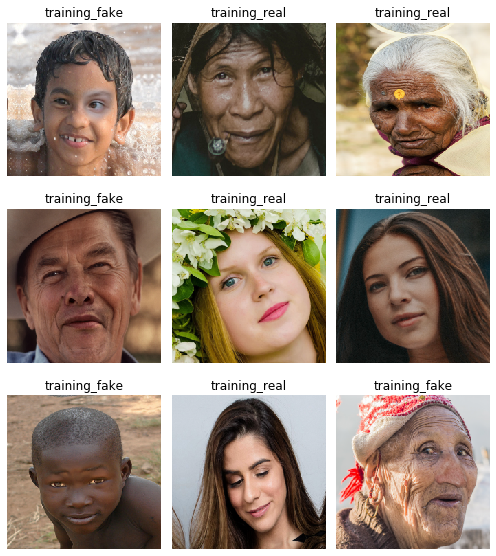

In [17]:
data.show_batch(rows=3, figsize=(7,8))

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['training_fake', 'training_real'], 2, 1633, 408)

# TRAIN


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.177459,0.959280,0.443627,00:53
1,1.086853,0.827447,0.421569,00:52
2,0.919119,0.735855,0.416667,00:52
3,0.808431,0.724377,0.401961,00:52


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


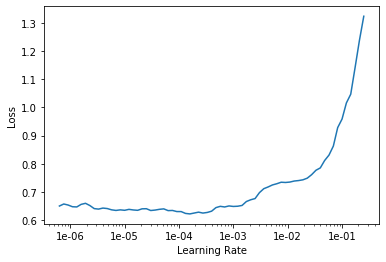

In [24]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.485768,0.688092,0.345588,00:53
1,0.448035,0.677325,0.345588,00:52


In [0]:
learn.save('stage-2')

# Interpretation

In [0]:
learn.load('stage-2');

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

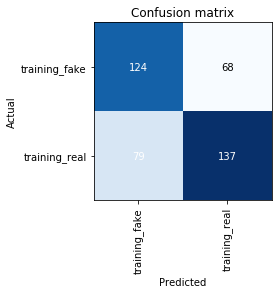

In [30]:
interp.plot_confusion_matrix()